# Finding Communities in Graphs

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (7,7)

## Creating a sample graph (from the networkx database)

In [16]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G)

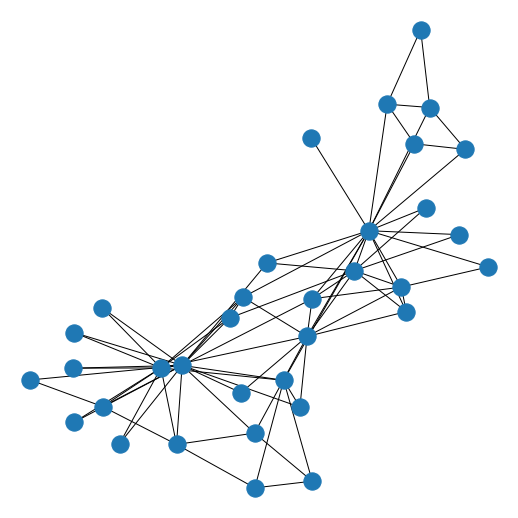

In [40]:
nx.draw(G, pos=pos)

In [5]:
# !pip install python-louvain

In [41]:
import community as cm

In [42]:
cm.best_partition(G, random_state=6)

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 1,
 5: 1,
 6: 1,
 7: 0,
 8: 2,
 9: 0,
 10: 1,
 11: 0,
 12: 0,
 13: 0,
 14: 2,
 15: 2,
 16: 1,
 17: 0,
 18: 2,
 19: 0,
 20: 2,
 21: 0,
 22: 2,
 23: 3,
 24: 3,
 25: 3,
 26: 2,
 27: 3,
 28: 3,
 29: 2,
 30: 2,
 31: 3,
 32: 2,
 33: 2}

In [43]:
best_part.values()

dict_values([0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 2, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2])

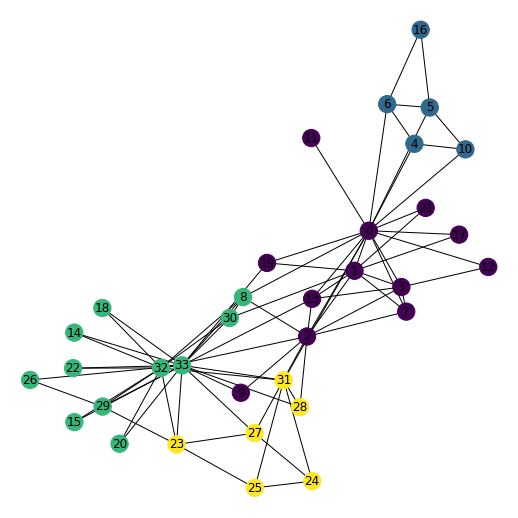

In [44]:
best_part = cm.best_partition(G, random_state=6)

nx.draw(G, 
        pos=pos, 
        node_color=[value for value in best_part.values()], 
        with_labels=True)

plt.show()

In [45]:
map_color = {
    0:'blue',
    1:'red',
    2:'black',
    3:'purple',
    4:'green',
    5:'cyan',
    6:'brown'
}

In [46]:
from pyvis.network import Network
example = Network(height="750px", width="100%", notebook=True)
    
example.from_nx(G)
[node.update({'value' : len(example.get_adj_list()[node['id']])}) for node in example.nodes]

counter = 0
    
for name in example.get_nodes():
    community = dict(best_part.items())[name]
    example.nodes[counter]['color'] = map_color[community]
    counter += 1
    
example.show('karate.html')

In [47]:
url = 'https://www.macalester.edu/~abeverid/data/stormofswords.csv'
got_data = pd.read_csv(url)
G = nx.from_pandas_edgelist(got_data, 'Source','Target', edge_attr='Weight')

from pyvis.network import Network
got_net = Network(height="750px", width="100%", notebook=True)
got_net.from_nx(G)
[node.update({'value' : len(got_net.get_adj_list()[node['id']])}) for node in got_net.nodes]
got_net.show("gameofthrones.html", )

In [52]:
G.nodes

NodeView(('Aemon', 'Grenn', 'Samwell', 'Aerys', 'Jaime', 'Robert', 'Tyrion', 'Tywin', 'Alliser', 'Mance', 'Amory', 'Oberyn', 'Arya', 'Anguy', 'Beric', 'Bran', 'Brynden', 'Cersei', 'Gendry', 'Gregor', 'Joffrey', 'Jon', 'Rickon', 'Roose', 'Sandor', 'Thoros', 'Balon', 'Loras', 'Belwas', 'Barristan', 'Illyrio', 'Hodor', 'Jojen', 'Luwin', 'Meera', 'Nan', 'Theon', 'Brienne', 'Bronn', 'Podrick', 'Lothar', 'Walder', 'Catelyn', 'Edmure', 'Hoster', 'Jeyne', 'Lysa', 'Petyr', 'Robb', 'Roslin', 'Sansa', 'Stannis', 'Elia', 'Ilyn', 'Meryn', 'Pycelle', 'Shae', 'Varys', 'Craster', 'Karl', 'Daario', 'Drogo', 'Irri', 'Daenerys', 'Aegon', 'Jorah', 'Kraznys', 'Missandei', 'Rakharo', 'Rhaegar', 'Viserys', 'Worm', 'Davos', 'Cressen', 'Salladhor', 'Eddard', 'Eddison', 'Gilly', 'Qyburn', 'Renly', 'Tommen', 'Janos', 'Bowen', 'Kevan', 'Margaery', 'Myrcella', 'Dalla', 'Melisandre', 'Orell', 'Qhorin', 'Rattleshirt', 'Styr', 'Val', 'Ygritte', 'Jon Arryn', 'Lancel', 'Olenna', 'Marillion', 'Robert Arryn', 'Ellaria', 

In [66]:
nx.shortest_path(G, source='Hodor',target='Lancel', weight='Weight')

['Hodor', 'Robb', 'Brienne', 'Sansa', 'Kevan', 'Lancel']

In [48]:
best_part = cm.best_partition(G, random_state=6)
pos = nx.kamada_kawai_layout(G)


In [62]:
G.nodes['Jon'].update({'Age': 30})

In [70]:
G.edges[('Brienne', 'Sansa')]

{'Weight': 5}

In [63]:
G.nodes['Jon']

{'Age': 30}

In [49]:
from pyvis.network import Network
got_network = Network(height="750px", width="100%", notebook=True)
    
got_network.from_nx(G)
[node.update({'value' : len(got_network.get_adj_list()[node['id']])}) for node in got_net.nodes]

counter = 0
    
for name in got_network.get_nodes():
    community = dict(best_part.items())[name]
    got_network.nodes[counter]['color'] = map_color[community]
    got_network.nodes[counter]['value'] = nx.pagerank(G)[name]
    counter += 1
    
got_network.show('got_colored.html')